<img src="https://raw.githubusercontent.com/codecaviar/digital_asset_management/master/assets/bingyune-and-company-logo-6400x3600.png" align="left" width="200" height="auto">

<br/><br/><br/><br/>

# Unknown Diabetes Risk: What to Do with Missing Data Values

**BingYune Chen**, Principal Data Scientist<br>
2020-07-23 | 6 minute read

Data is provided by [Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database) 
    | Source code is on [Github](https://github.com/codecaviar)

---

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The goal of this project is to provide a Quick Guide on the best practices to handle data with missing values.

## Table of Contents

1. [**Project Overview**](#overview)
2. [**Identify Missing Values**](#identify_missing)
3. [**Delete Missing Values**](#delete_missing)
4. [**Impute Missing Values**](#impute_missing)
5. [**Specific Use Cases**](#use_cases)
6. [**Conclusion**](#conclusion)

<a class="anchor" id="overview"></a>
# 1. Project Overview

Missing data (or missing values) is defined as the data value that is not stored for a variable in the observation of interest. The problem of missing data is relatively common in almost all data science problems and can have a significant effect on the conclusions that can be drawn from machine learning models. Most datasets have missing values, and the likelihood of having missing values increases with the size of the dataset. In general, there are three types of missing data: 1) Missing completely at random (i.e. not systematic, missing data is just a random subset of the data); 2) Missing at Random (i.e. systematic, missing data is conditional on another observed variable); and 3) Missing Not at Random (i.e. non-ignorable and problematic, missing data mechanism has to be modeled). The first step in diagnosing randomness of the missing data is to use your substantive scientific knowledge of the data and your field. The second step is knowing how to identify, remove, and impute missing values as needed.

<a class="anchor" id="problem_statement"></a>
## 1.1 Problem Statement

> The goal of this project is to provide a Quick Guide on the best practices to handle data with missing values. 

The project makes use of the Pima Indians Diabetes Database from [Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database). The dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The dataset was created to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. A key constraint of the dataset is that all patients identify as female at least 21 years old of Pima Indian heritage. There are a total of 768 observations and 9 variables:

* Pregnancies - number of times an individual has been pregnant
* Glucose - blood plasma glucose concentration after a 2 hour oral glucose tolerance test
* BloodPressure - Diastolic blood pressure (mm/HG)
* SkinThickness - Skinfold thickness of the triceps (mm)
* Insulin - 2 hour serum insulin (mu U/ml)
* BMI - Body mass index with weight/height (kg/m squared)
* DiabetesPedigreeFunction - A function that determines the risk of type 2 diabetes based on family history, the larger the function, the higher the risk of type 2 diabetes
* Age - in years
* Outcome - Whether the person is diagnosed with type 2 diabetes (1 = yes, 0 = no)

In [2]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import missingno as msno # visualize missing values

# Load the dataset
diabetes = pd.read_csv('/content/drive/MyDrive/DATA PREPROCESSING/CODE/DATA IMPUTATION/data/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<a class="anchor" id="identify_missing"></a>
# 2. Identify Missing Values

The best way to identify and mark values as missing is to use plots and summary statistics. For example, we can see that columns such as Pregnancies, Glucose, and BloodPressure have a minimum value of zero (0). While a value of zero can be possible for the Pregnancies column, such a value does not make sense and indicates an invalid or missing value on other columns. We can see that columns Glucose, BloodPressure, and BMI have just a few missing values, whereas columns SkinThickness and Insulin have nearly half of the rows as missing values. In order to insure there are a sufficient number of records left to train a predictive model, we will need to apply different strategies to each column will missing values.

In [3]:
# Load and summarize the dataset
print(diabetes.describe())

# Glucose, BloodPressure, SkinThickness, Insulin, BMI have an invalid zero minimum value

       Pregnancies     Glucose  ...         Age     Outcome
count   768.000000  768.000000  ...  768.000000  768.000000
mean      3.845052  120.894531  ...   33.240885    0.348958
std       3.369578   31.972618  ...   11.760232    0.476951
min       0.000000    0.000000  ...   21.000000    0.000000
25%       1.000000   99.000000  ...   24.000000    0.000000
50%       3.000000  117.000000  ...   29.000000    0.000000
75%       6.000000  140.250000  ...   41.000000    1.000000
max      17.000000  199.000000  ...   81.000000    1.000000

[8 rows x 9 columns]


In [4]:
# Mark invalid zero values as NaN (null)
temp_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']  
diabetes[temp_cols] = diabetes[temp_cols].replace(0, np.nan)
print(diabetes.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


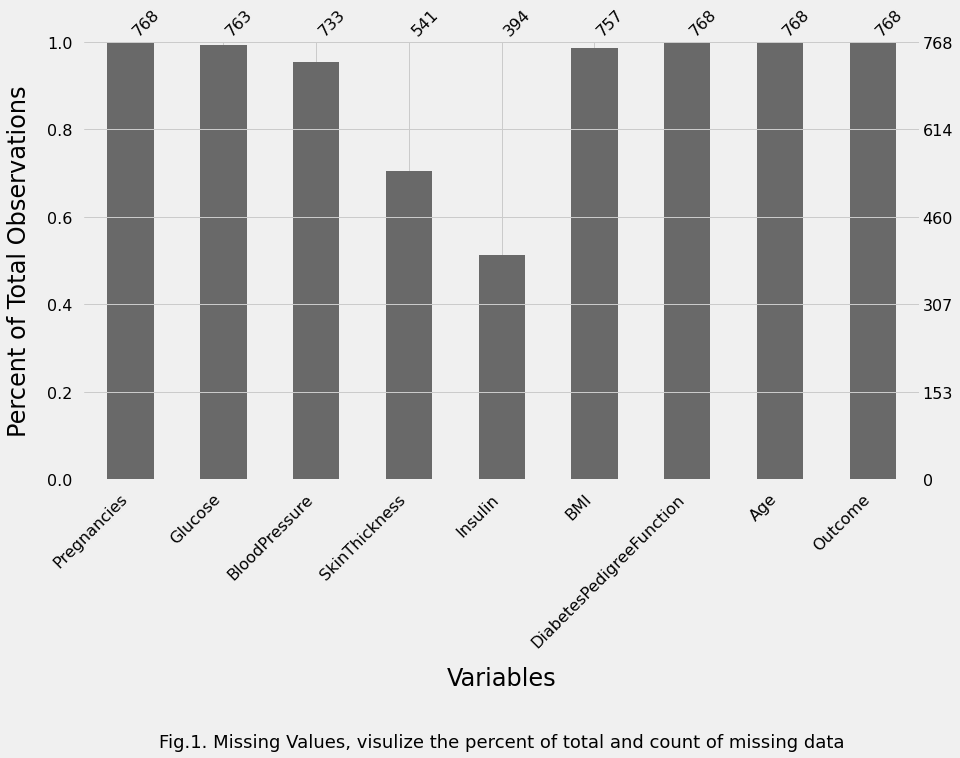

In [6]:
# Use Missingno python library to visualize null values
# Visualize the number of missing values as a bar chart 
fig,ax = plt.subplots()
fig = msno.bar(diabetes, inline=False, figsize=(13.33,7.5))

# Add labels
ax.set_xlabel('Variables', size=24, labelpad=16)
ax.set_ylabel('Percent of Total Observations', size=24, labelpad=16)
ax.tick_params(axis='both', labelsize=16, length=8)

# Add caption
fignum = 1
figtxt = ". Missing Values, visulize the percent of total and count of missing data"
figcap = "Fig." + str(fignum) + figtxt
ax.text(0.5, -0.6, figcap, fontsize=18, ha='center', va='center', transform=ax.transAxes)
plt.savefig('fig' + str(fignum) + '-missing-bar-chart.png', bbox_inches='tight')

plt.show;

The msno.matrix nullity matrix is a data-dense display which lets you quickly visually pick out patterns in data completion. The plot appears blank(white) wherever there are missing values. For instance, in the Glucose column there are only 5 instances of missing data, hence the 5 white lines. The sparkline on the right gives an idea of the general shape of the completeness of the data and points out the row with the minimum nullities and the total number of columns in a given dataset, at the bottom.

The Glucose column has very few missing values and does not seem to be correlated with any other column. As a result, the "missingness" in Glucose column can likely be attributed as missing completely at random. On the other hand, both the SkinThickness and Insulin columns have a lot of missing values. These columns might be case of missing at random, as we cannot directly observe the reason for "missingness" of data in these columns.

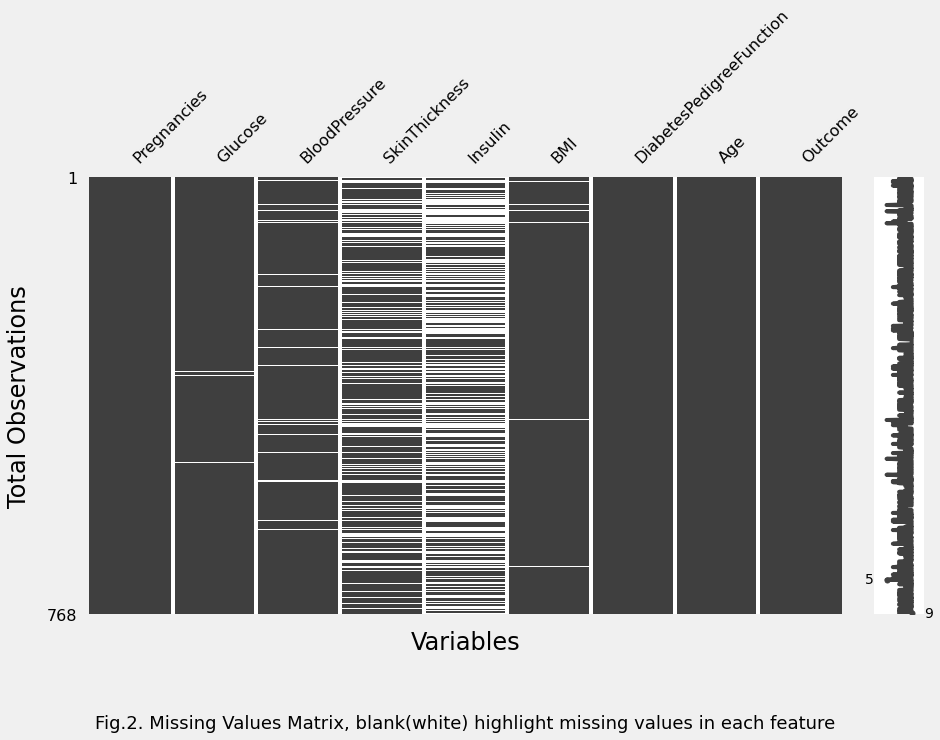

In [7]:
# Visualize the number of missing values as a matrix
fig = msno.matrix(diabetes, inline=False, figsize=(13.33,7.5))

# Add labels
plt.xlabel('Variables', size=24, labelpad=16)
plt.ylabel('Total Observations', size=24, labelpad=16)
plt.tick_params(axis='both', labelsize=16, length=8)

# Add caption
fignum += 1
figtxt = ". Missing Values Matrix, blank(white) highlight missing values in each feature"
figcap = "Fig." + str(fignum) + figtxt
plt.text(0.5, -0.25, figcap, fontsize=18, ha='center', va='center', transform=fig.transAxes)
plt.savefig('fig' + str(fignum) + '-missing-data-matrix.png', bbox_inches='tight')

plt.show;

The msno.heatmap is graphical representation of data where the individual values contained in a matrix are represented as colors. The plot provide a "flat" image of two-dimensional histograms (representing for instance the density of a certain area). The SkinThickness and Insulin columns appear to be correlated between missing values, suggesting the data may not be missing at random.

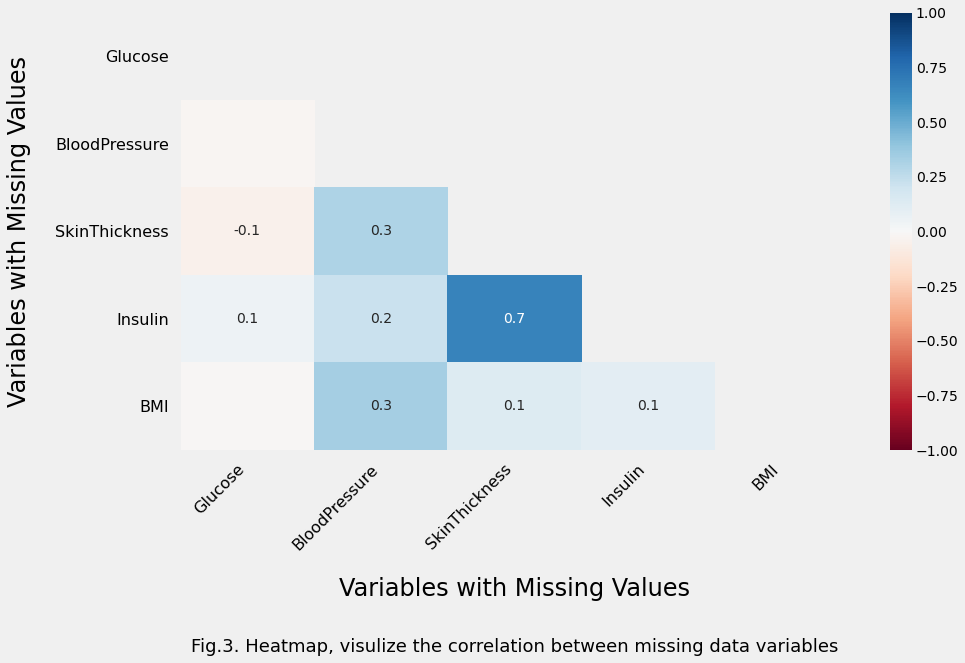

In [8]:
# Visualize the number of missing values as a heatmap
fig = msno.heatmap(diabetes, inline=False, figsize=(13.33,7.5))

# Add labels
plt.xlabel('Variables with Missing Values', size=24, labelpad=24)
plt.ylabel('Variables with Missing Values', size=24, labelpad=24)
plt.tick_params(axis='both', labelsize=16, length=8)

# Add caption
fignum += 1
figtxt = ". Heatmap, visulize the correlation between missing data variables"
figcap = "Fig." + str(fignum) + figtxt
plt.text(0.5, -0.45, figcap, fontsize=18, ha='center', va='center', transform=fig.transAxes)
plt.savefig('fig' + str(fignum) + '-missing-data-heatmap.png', bbox_inches='tight')

plt.show;

<a class="anchor" id="delete_missing"></a>
# 3. Delete Missing Values

The simplest strategy for handling missing data is to delete records that contain a missing value. When dealing with data that is missing completely at random or missing at random, related data can be deleted to reduce bias. 

* **Listwise** - removes all data for an observation that has one or more missing values. The technique may be useful if the missing data is limited to a small number of observations, but it is often disadvantageous to use listwise deletion. Removing rows with missing values can be too limiting on some predictive modeling problems.
* **Pairwise** - deletes an observation when it is missing a variable required for a particular analysis, but includes that observation in analyses for which all required variables are present. The challenge with this technique is that it assumes the missing data is missing completely at random (difficult to support). 
* **Dropping Variables** - drop variables if the data is missing for more than 60% of observations, but only if that variable is insignificant and not correlated to the target. 

In [9]:
print('----- Listwise Deletion -----\n')

# Apply listwise deletion
diabetes_copy = diabetes.copy(deep=True)
print("Original Data {}".format(diabetes_copy.shape))
diabetes_copy.dropna(inplace=True)
print("After Deletion {}".format(diabetes_copy.shape))

# Deleted 48% of the dataset (red flag)

print('\n----- Pairwise Deletion -----\n')

# Apply pairwise deletion
# All operations in pandas like mean, sum, etc. intrinsically skip missing values
diabetes_copy = diabetes.copy(deep=True)['Insulin'].replace(np.nan, 0)
print("Original Data Mean {}".format(diabetes_copy.mean(skipna=False)))
diabetes_copy = diabetes.copy(deep=True)
print("After Deletion Mean {}".format(diabetes_copy['Insulin'].mean()))      

print('\n----- Dropping Variables -----\n')

# Apply dropping variables
diabetes_copy = diabetes.copy(deep=True)
print("Original Data {}".format(diabetes_copy.shape))
diabetes_copy.drop(columns=['SkinThickness', 'Insulin'], inplace=True)
print("After Deletion {}".format(diabetes_copy.shape))

----- Listwise Deletion -----

Original Data (768, 9)
After Deletion (392, 9)

----- Pairwise Deletion -----

Original Data Mean 79.79947916666667
After Deletion Mean 155.5482233502538

----- Dropping Variables -----

Original Data (768, 9)
After Deletion (768, 7)


<a class="anchor" id="impute_missing"></a>
# 4. Impute Missing Values

Imputing (or "fill in") refers to using a model to replace missing values. There are many options to consider when replacing a missing value. For instance, we could use a constant value that has meaning within the domain, such as 0, distinct from all other values. Another option would be to use a value from another randomly selected observation. A common approach is to use the mean, median or mode value for the column. Alternatively, we could use the value estimated by another predictive model (e.g. linear regression).

The SimpleImputer is a data transform from scikit-learn that is first configured based on the type of statistic to calculate for each column, e.g. mean. Then the imputer is fit on a dataset to calculate the statistic for each column. The fit imputer is then applied to a dataset to create a copy of the dataset with all missing values for each column replaced with a statistic value.

In [10]:
from sklearn.impute import SimpleImputer

# Define X and y
X = diabetes[diabetes.columns[:-1]]
y = diabetes.columns[-1]

# Print total missing before imputation
print('----- See Original Count, Mean, and STD -----\n')
print(X[['BloodPressure', 'SkinThickness', 'Insulin']].describe())

# Define imputer
imputer = SimpleImputer(strategy='mean') 

# Use mean, median, or constant for numeric 
# Use most_frequent for categorical

# Fit on the dataset
imputer.fit(X)

# Transform the dataset
Xtrans = imputer.transform(X)

# Print total missing after imputation
print('\n----- See Changes in Count, Mean, and STD -----\n')
print(pd.DataFrame(Xtrans, columns=X.columns)[['BloodPressure', 'SkinThickness', 'Insulin']].describe())

----- See Original Count, Mean, and STD -----

       BloodPressure  SkinThickness     Insulin
count     733.000000     541.000000  394.000000
mean       72.405184      29.153420  155.548223
std        12.382158      10.476982  118.775855
min        24.000000       7.000000   14.000000
25%        64.000000      22.000000   76.250000
50%        72.000000      29.000000  125.000000
75%        80.000000      36.000000  190.000000
max       122.000000      99.000000  846.000000

----- See Changes in Count, Mean, and STD -----

       BloodPressure  SkinThickness     Insulin
count     768.000000     768.000000  768.000000
mean       72.405184      29.153420  155.548223
std        12.096346       8.790942   85.021108
min        24.000000       7.000000   14.000000
25%        64.000000      25.000000  121.500000
50%        72.202592      29.153420  155.548223
75%        80.000000      32.000000  155.548223
max       122.000000      99.000000  846.000000


The KNNImputer class from scikit-learn provides imputation for filling in missing values using the k-Nearest Neighbors approach. Using the values from n_neighbors nearest neighbors that have a value for the feature, the algorithm assigns a value to each missing value. The feature of the neighbors are averaged uniformly or weighted by distance to each neighbor.

In [11]:
from sklearn.impute import KNNImputer

# Define X and y
X = diabetes[diabetes.columns[:-1]]
y = diabetes.columns[-1]

# Print total missing before imputation
print('----- See Original Count, Mean, and STD -----\n')
print(X[['BloodPressure', 'SkinThickness', 'Insulin']].describe())

knn_imputer = KNNImputer(n_neighbors=2, weights='uniform')
Xtrans = knn_imputer.fit_transform(X)

# Print total missing after imputation
print('\n----- See Changes in Count, Mean, and STD -----\n')
print(pd.DataFrame(Xtrans, columns=X.columns)[['BloodPressure', 'SkinThickness', 'Insulin']].describe())

----- See Original Count, Mean, and STD -----

       BloodPressure  SkinThickness     Insulin
count     733.000000     541.000000  394.000000
mean       72.405184      29.153420  155.548223
std        12.382158      10.476982  118.775855
min        24.000000       7.000000   14.000000
25%        64.000000      22.000000   76.250000
50%        72.000000      29.000000  125.000000
75%        80.000000      36.000000  190.000000
max       122.000000      99.000000  846.000000

----- See Changes in Count, Mean, and STD -----

       BloodPressure  SkinThickness     Insulin
count     768.000000     768.000000  768.000000
mean       72.354818      29.147135  154.886719
std        12.283460       9.778470  105.099491
min        24.000000       7.000000   14.000000
25%        64.000000      22.000000   84.000000
50%        72.000000      29.000000  129.000000
75%        80.000000      36.000000  193.000000
max       122.000000      99.000000  846.000000


The Multivariate Imputation by Chained Equations (MICE) uses the IterativeImputer class from scikit-learn to support iterative imputation. The strategy models each feature with missing values as a function of other features in a round-robin fashion. The algorithm performs multiple regressions over random samples of the data, then takes the average of the multiple regression values and uses that value to impute the missing value.

In [12]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Define X and y
X = diabetes[diabetes.columns[:-1]]
y = diabetes.columns[-1]

# Print total missing before imputation
print('----- See Original Count, Mean, and STD -----\n')
print(X[['BloodPressure', 'SkinThickness', 'Insulin']].describe())

mice_imputer = IterativeImputer() # default max_iter=10 for rounds of imputation
Xtrans = mice_imputer.fit_transform(X)

# Print total missing after imputation
print('\n----- See Changes in Count, Mean, and STD -----\n')
print(pd.DataFrame(Xtrans, columns=X.columns)[['BloodPressure', 'SkinThickness', 'Insulin']].describe())

----- See Original Count, Mean, and STD -----

       BloodPressure  SkinThickness     Insulin
count     733.000000     541.000000  394.000000
mean       72.405184      29.153420  155.548223
std        12.382158      10.476982  118.775855
min        24.000000       7.000000   14.000000
25%        64.000000      22.000000   76.250000
50%        72.000000      29.000000  125.000000
75%        80.000000      36.000000  190.000000
max       122.000000      99.000000  846.000000

----- See Changes in Count, Mean, and STD -----

       BloodPressure  SkinThickness     Insulin
count     768.000000     768.000000  768.000000
mean       72.352451      28.906892  152.650328
std        12.147216       9.521956   97.342139
min        24.000000       7.000000  -19.507362
25%        64.000000      22.120844   89.983889
50%        72.000000      28.447099  130.185304
75%        80.000000      35.000000  190.000000
max       122.000000      99.000000  846.000000


<a class="anchor" id="use_cases"></a>
# 5. Specific Use Cases

Time-Series data comes in four main types: 1) no trend or seasonality; 2) trend, but no seasonality; 3) seasonality, but no trend; and 4) both trend and seasonality. The time series methods of imputation assume the adjacent observations will be like the missing data. 

* Last observation carried forward (LOCF) will impute missing values with the last observed values 
    - fillna(method='ffill', inplace=True)
* Next observation carried backward (NOCB) will impute missing values with the next observed values 
    - fillna(method='bfill', inplace=True)
* Linear interpolation assumes a linear relationship between data points and uses non-missing values from adjacent data points to compute a value for a missing data point 
    - interpolate(limit_direction='both', inplace=True)

Alternatively, some machine learning algorithms like XGBoost and LightGBM can handle missing values without any preprocessing, by supplying relevant parameters for "missing" values.  

<a class="anchor" id="conclusion"></a>
# 6. Conclusion

In real world data, there are often cases where a particular observation is missing because of various reasons, such as invalid or corrupt values. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values. When it comes to machine learning with Python, missing values can be handled in many different ways (each with its own pros and cons). For instance, deleting the rows or columns having null values is a simple technique, but you also lose a lot of information. Alternatively, columns in the dataset with numeric continuous values can be replaced with the mean, median, or a constant of remaining values in the column. When the missing values are from categorical columns (string), the missing values can be replaced with the most frequent category in the column. More advanced methods use either a classification or regression model to predict missing values depending on nature of the feature having a missing value. Lastly, having a domain knowledge about the dataset is also important because making the right decision on how to handle missing values generates more robust data models and better conclusions.

<a class="anchor" id="Acknowledgments"></a>
### Acknowledgments 

The project referenced the following resources:
* https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e
* https://towardsdatascience.com/easy-data-science-with-r-and-python-diabetes-among-the-pima-indians-an-exploratory-analysis-d7bc321d0fa7
* https://machinelearningmastery.com/handle-missing-data-python/
* https://bmcmedresmethodol.biomedcentral.com/articles/10.1186/s12874-017-0442-1

---
<em>The Code Caviar</em> is a digital magazine about data science and analytics that dives deep into key topics, so you can experience the thrill of solving at scale. 